In [60]:
import pandas as pd
text_messages = pd.read_csv('train_spam.csv', encoding = 'ISO-8859-1', usecols = ['v1', 'v2'])

In [61]:
text_messages

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [62]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
text_messages['v2'] = text_messages['v2'].apply(preprocess_text)


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(text_messages['v2']).toarray()


In [65]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
y = pd.get_dummies(text_messages['v1'])
y = y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [68]:
from sklearn.naive_bayes import MultinomialNB
spam_detection_model = MultinomialNB().fit(X_train, y_train)

In [69]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = spam_detection_model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9865470852017937
F1 Score: 0.9865638647203537


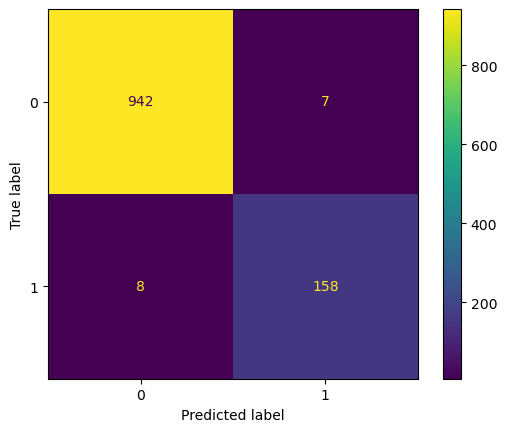

In [70]:
import matplotlib.pyplot as plt

labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [81]:
new_messages = ['Get a free cruise now!', 'Hey, can you pick up some milk on your way home?']
new_messages = [preprocess_text(msg) for msg in new_messages]
new_messages = cv.transform(new_messages)
predictions1 = spam_detection_model.predict(new_messages)
print('Predictions:', predictions1)

Predictions: [1 0]


In [82]:
for i in predictions1:
    if i:
        print("spam message")
    else:
        print("ham message")

spam message
ham message


In [83]:
new_messages = ['Special offer just for you! Get 1GB @15 bob valid for 1 hour ! Dial *544# and select Amazing data to get this offer!'
, 'Get a free cruise now!']
new_messages = [preprocess_text(msg) for msg in new_messages]
new_messages = cv.transform(new_messages)
predictions2 = spam_detection_model.predict(new_messages)
predictions2

array([1, 1], dtype=uint8)

In [84]:
for i in predictions2:
    if i:
        print("spam message")
    else:
        print("ham message")

spam message
spam message


In [75]:
df = pd.read_csv('test_spam.csv',usecols=['text'])

In [76]:
new_messages = [preprocess_text(msg) for msg in df['text']]
new_messages = cv.transform(new_messages)
predictions = spam_detection_model.predict(new_messages)


In [77]:
df['Spam message']=predictions

In [78]:
df['Spam message']=df['Spam message'].replace(1,True)
df['Spam message']=df['Spam message'].replace(0,False)

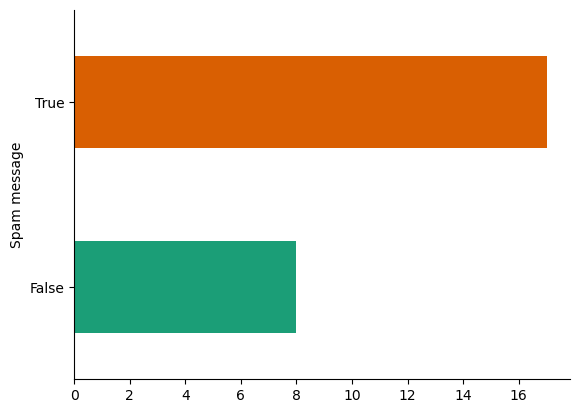

In [96]:
from matplotlib import pyplot as plt
import seabornb
df.groupby('Spam message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)